**Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow**

In [1]:
 # Data

import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-11 06:24:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   163MB/s    in 0.6s    

2021-10-11 06:24:58 (163 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:

# Inspect the data

!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
 # Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [8]:
 # Visualize

 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg
 import random

 def view_random_image(target_dir,target_class):

   # setup the target directory

   target_folder=target_dir+target_class
   
   # Get a random image path

   random_image =random.sample(os.listdir(target_folder),1) 
   print(random_image)

   # Read in the image and plot it using matplotlib
   img=mpimg.imread(target_folder + "/" + random_image[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image shape: {img.shape}") # show the shape of the image

   return img

   


['2146963.jpg']
Image shape: (512, 384, 3)


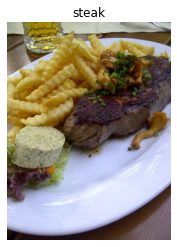

In [9]:
# View a random image from the training dataset

img=view_random_image(target_dir="pizza_steak/train/",
                target_class="steak")

In [10]:
# View the img

img

array([[[150, 156, 130],
        [152, 158, 132],
        [154, 160, 134],
        ...,
        [125, 127, 114],
        [119, 121, 108],
        [115, 117, 104]],

       [[151, 157, 131],
        [153, 159, 133],
        [155, 161, 135],
        ...,
        [148, 151, 140],
        [143, 146, 135],
        [140, 143, 132]],

       [[153, 158, 135],
        [155, 160, 137],
        [157, 162, 139],
        ...,
        [168, 171, 160],
        [164, 167, 156],
        [162, 165, 154]],

       ...,

       [[ 17,   1,   2],
        [ 17,   1,   2],
        [ 16,   1,   4],
        ...,
        [106,  90,  91],
        [101,  85,  86],
        [ 96,  80,  80]],

       [[ 17,   1,   2],
        [ 17,   1,   4],
        [ 16,   1,   4],
        ...,
        [104,  88,  89],
        [ 99,  83,  84],
        [ 94,  78,  78]],

       [[ 19,   3,   4],
        [ 19,   3,   6],
        [ 18,   3,   8],
        ...,
        [103,  87,  88],
        [ 97,  81,  81],
        [ 92,  76,  76]]

In [11]:
# View the image shape

img.shape

(512, 384, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.58823529, 0.61176471, 0.50980392],
        [0.59607843, 0.61960784, 0.51764706],
        [0.60392157, 0.62745098, 0.5254902 ],
        ...,
        [0.49019608, 0.49803922, 0.44705882],
        [0.46666667, 0.4745098 , 0.42352941],
        [0.45098039, 0.45882353, 0.40784314]],

       [[0.59215686, 0.61568627, 0.51372549],
        [0.6       , 0.62352941, 0.52156863],
        [0.60784314, 0.63137255, 0.52941176],
        ...,
        [0.58039216, 0.59215686, 0.54901961],
        [0.56078431, 0.57254902, 0.52941176],
        [0.54901961, 0.56078431, 0.51764706]],

       [[0.6       , 0.61960784, 0.52941176],
        [0.60784314, 0.62745098, 0.5372549 ],
        [0.61568627, 0.63529412, 0.54509804],
        ...,
        [0.65882353, 0.67058824, 0.62745098],
        [0.64313725, 0.65490196, 0.61176471],
        [0.63529412, 0.64705882, 0.60392157]],

       ...,

       [[0.06666667, 0.00392157, 0.00784314],
        [0.06666667, 0.00392157, 0.00784314],
        [0.0627451 , 0

In [13]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [14]:
#Set the random seed

tf.random.set_seed(42)

# Preprocess data

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
# Path of directories

train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

# Improve data ffrom directories and turn in into btaches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)
 
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              seed=42)

# Build  a CNN model

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 258ms/step - loss: 0.5815 - accuracy: 0.6767 - val_loss: 0.4357 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4266 - accuracy: 0.8073 - val_loss: 0.3390 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3821 - accuracy: 0.8327 - val_loss: 0.3452 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.3547 - accuracy: 0.8487 - val_loss: 0.3678 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3273 - accuracy: 0.8713 - val_loss: 0.3706 - val_accuracy: 0.8360


In [15]:
# Model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [17]:
# Another way

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2=model_2.fit(train_data,epochs=5,
                       steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 2.2132 - accuracy: 0.6360 - val_loss: 0.6370 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6546 - accuracy: 0.7273 - val_loss: 0.4793 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.9041 - accuracy: 0.6980 - val_loss: 0.5162 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5961 - accuracy: 0.7673 - val_loss: 0.6528 - val_accuracy: 0.6420
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6291 - accuracy: 0.7460 - val_loss: 0.5581 - val_accuracy: 0.7540


In [18]:
# Model summary

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less **parameters**